In [1]:
import numpy as np
import pandas as pd

from pulse2percept import electrode2currentmap as e2cm
from pulse2percept import effectivecurrent2brightness as ec2b

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# pulse train used in Nanduri et al. (2012)
def get_pulse_train(freq, ampl, pulse_dur=0.45/1000, dur=0.5, tsample=5e-6):
    return e2cm.Psycho2Pulsetrain(freq=freq, dur=dur, 
                                  pulse_dur=pulse_dur, interphase_dur=0,
                                  delay=0.,
                                  tsample=tsample, current_amplitude=ampl, 
                                  pulsetype='cathodicfirst')

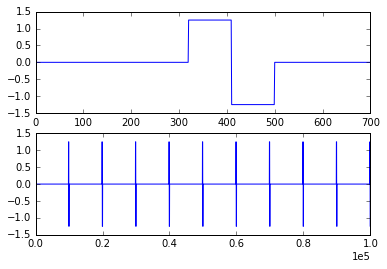

In [3]:
pulse_train = get_pulse_train(20, 1.25)
plt.subplot(211)
plt.plot(pulse_train.data[9500:10200])
plt.subplot(212)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(pulse_train.data)

In [4]:
ea1 = e2cm.ElectrodeArray([250], [0], [0], [0])

In [5]:
tm = ec2b.TemporalModel(model='Nanduri')

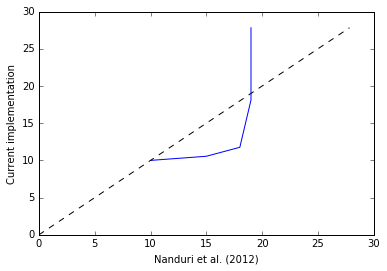

In [6]:
B = []
for ampl in [1.25, 1.5, 2, 4, 6]:
    R4 = tm.model_cascade(get_pulse_train(20, ampl), dojit=True)
    B.append(R4.data.max())
    
# normalize so first value is B=10
scale = B[0] / 10.0

plt.plot([10, 15, 18, 19, 19], B / scale)
plt.plot([0, B[-1]/scale], [0, B[-1]/scale], '--k')
plt.xlabel('Nanduri et al. (2012)')
plt.ylabel('Current implementation')

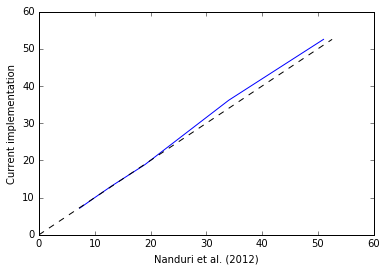

In [7]:
B = []
for freq in [13, 20, 27, 40, 80, 120]:
    R4 = tm.model_cascade(get_pulse_train(freq, 1.25), dojit=True)
    B.append(R4.data.max())

plt.plot([7.3, 10, 13, 19, 34, 51], B / scale)
plt.plot([0, B[-1]/scale], [0, B[-1]/scale], '--k')
plt.xlabel('Nanduri et al. (2012)')
plt.ylabel('Current implementation')